In [243]:
from google.colab import drive

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
df_train = pd.read_csv("/content/drive/MyDrive/machine learning/kaggle/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/machine learning/kaggle/test.csv")
# df_sample = pd.read_csv("/content/drive/MyDrive/machine learning/kaggle/sample_submission.csv")

In [246]:
df_train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [247]:
columns_to_drop = ["failure", "id"]
df_train_data, df_train_target = df_train.drop(columns = columns_to_drop), df_train["failure"]
df_test = df_test.drop(columns = "id")

In [248]:
df_test.dtypes

product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
dtype: object

In [249]:
df_train_data.dtypes

product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
dtype: object

In [250]:
df_train_data.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,...,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,...,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,...,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,...,18.340250,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,...,19.021000,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,...,19.708000,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000


Lets find the null values in both training and testing datasets

In [251]:
df_train_data.isnull().sum()

product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
dtype: int64

In [252]:
df_test.isnull().sum()

product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

we observe that only columns with dtype = float have missing values in the dataset. so we fill the missing values with mean of the respective column

In [253]:
# mode for each column of dtype = object
means = df_train_data.select_dtypes(include = "float").mean()

# fill all the median values in the corresponding columns
df_train_data = df_train_data.fillna(means)

In [254]:
means = df_test.select_dtypes(include = "float").mean()

# fill all the median values in the corresponding columns
df_test = df_test.fillna(means)

In [255]:
# lets recheck missing values
df_train_data.isnull().sum()

product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [256]:
df_test.isnull().sum()

product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [257]:
df_train_data

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,20.155,10.672000,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684000,764.100
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,17.889,12.448000,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631000,682.057
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,18.288,12.715000,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946000,663.376
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,19.060,12.471000,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172000,826.282
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,18.093,10.337000,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412000,579.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,19.354,11.430725,12.177,17.942000,10.112,15.795,18.572000,16.144,16.460727,729.131
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,19.563,11.242000,14.179,20.564000,10.234,14.450,14.322000,13.146,16.471000,853.924
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,19.279,11.407000,16.437,17.476000,8.668,15.069,16.599000,15.590,14.065000,750.364
26568,E,106.38,material_7,material_6,6,9,2,9,4,18.059,...,19.358,11.392000,17.064,17.814000,14.928,16.273,15.485000,13.624,12.865000,730.156


Lets encode categorical data

In [258]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector

encoder = LabelEncoder()
object_column_selector = selector(dtype_include='object')

object_dtype_columns = df_train_data[object_column_selector(df_train_data)]
object_dtype_columns2 = df_test[object_column_selector(df_test)]

# Encode the selected columns

for column in object_dtype_columns.columns:
  df_train_data[column] = encoder.fit_transform(df_train_data[column])

for column in object_dtype_columns2.columns:
  df_test[column] = encoder.fit_transform(df_test[column])

In [259]:
df_train_data

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0,80.10,1,2,9,5,7,8,4,18.040,...,20.155,10.672000,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684000,764.100
1,0,84.89,1,2,9,5,14,3,3,18.213,...,17.889,12.448000,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631000,682.057
2,0,82.43,1,2,9,5,12,1,5,18.057,...,18.288,12.715000,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946000,663.376
3,0,101.07,1,2,9,5,13,2,6,17.295,...,19.060,12.471000,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172000,826.282
4,0,188.06,1,2,9,5,9,2,8,19.346,...,18.093,10.337000,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412000,579.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,4,158.95,1,1,6,9,6,16,4,16.301,...,19.354,11.430725,12.177,17.942000,10.112,15.795,18.572000,16.144,16.460727,729.131
26566,4,146.02,1,1,6,9,10,12,8,17.543,...,19.563,11.242000,14.179,20.564000,10.234,14.450,14.322000,13.146,16.471000,853.924
26567,4,115.62,1,1,6,9,1,10,1,15.670,...,19.279,11.407000,16.437,17.476000,8.668,15.069,16.599000,15.590,14.065000,750.364
26568,4,106.38,1,1,6,9,2,9,4,18.059,...,19.358,11.392000,17.064,17.814000,14.928,16.273,15.485000,13.624,12.865000,730.156


In [260]:
df_test

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0,119.57,0,1,6,4,6,9,6,19.305,...,18.654,10.802,15.909000,18.070000,13.772,13.659,16.825,13.742,17.710000,634.612
1,0,113.51,0,1,6,4,11,8,0,17.883,...,19.368,12.032,13.998000,18.846571,12.473,17.468,16.708,14.776,14.102000,537.037
2,0,112.16,0,1,6,4,8,12,4,18.475,...,17.774,11.743,17.046000,18.086000,10.907,13.363,15.737,17.065,16.021000,658.995
3,0,112.72,0,1,6,4,8,11,10,16.518,...,18.948,11.790,18.165000,16.163000,10.933,15.501,15.667,12.620,16.111000,594.301
4,0,208.00,0,1,6,4,14,16,8,17.808,...,19.141,12.370,14.578000,17.849000,11.941,16.070,16.183,13.324,17.150000,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,3,144.74,1,0,9,5,0,4,9,18.465,...,18.573,11.691,16.123986,19.771000,11.562,17.246,15.131,15.209,16.636052,696.466
20771,3,74.53,1,0,9,5,4,8,7,18.900,...,17.917,10.980,16.027000,15.694000,13.564,15.494,15.296,13.812,16.501000,613.249
20772,3,67.73,1,0,9,5,10,11,2,18.656,...,19.630,10.436,16.137000,20.612000,11.134,16.519,15.525,14.175,17.728000,783.349
20773,3,126.15,1,0,9,5,8,16,11,16.536,...,19.575,12.672,15.422000,19.496000,9.319,15.817,17.403,16.437,15.179000,745.210


visualization

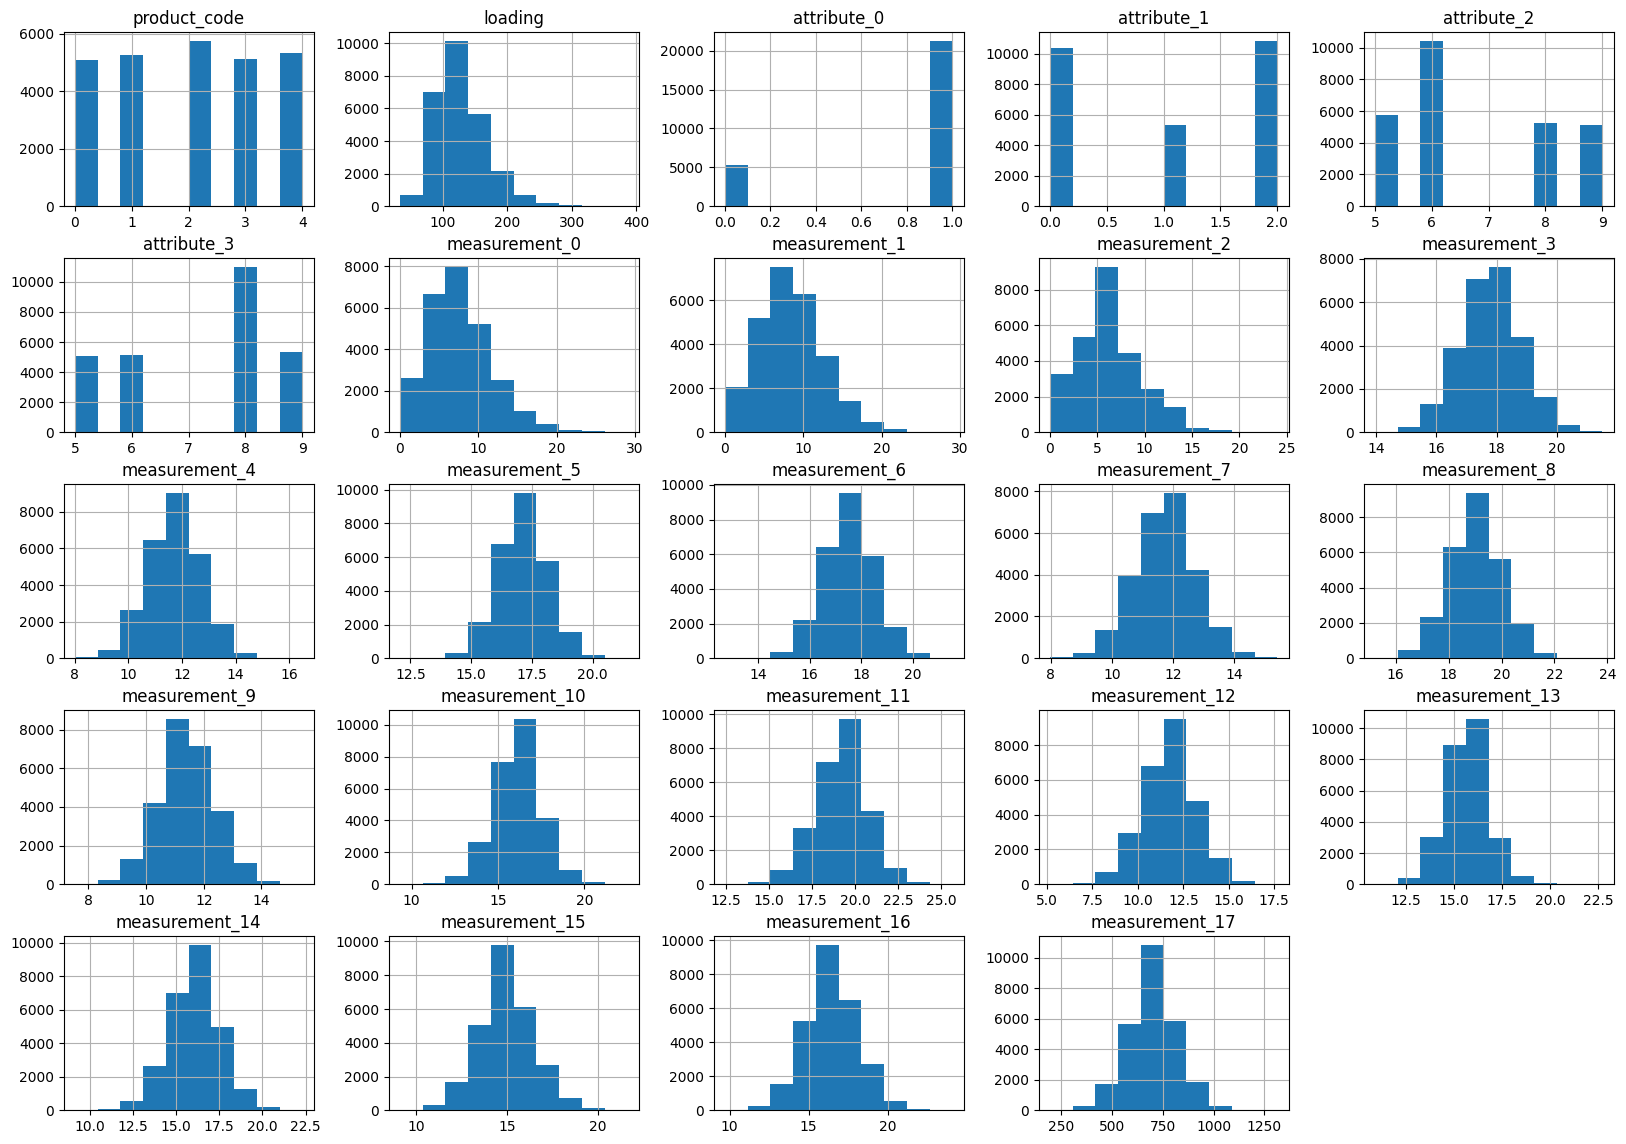

In [261]:
_ = df_train_data.hist(figsize=(20,14))

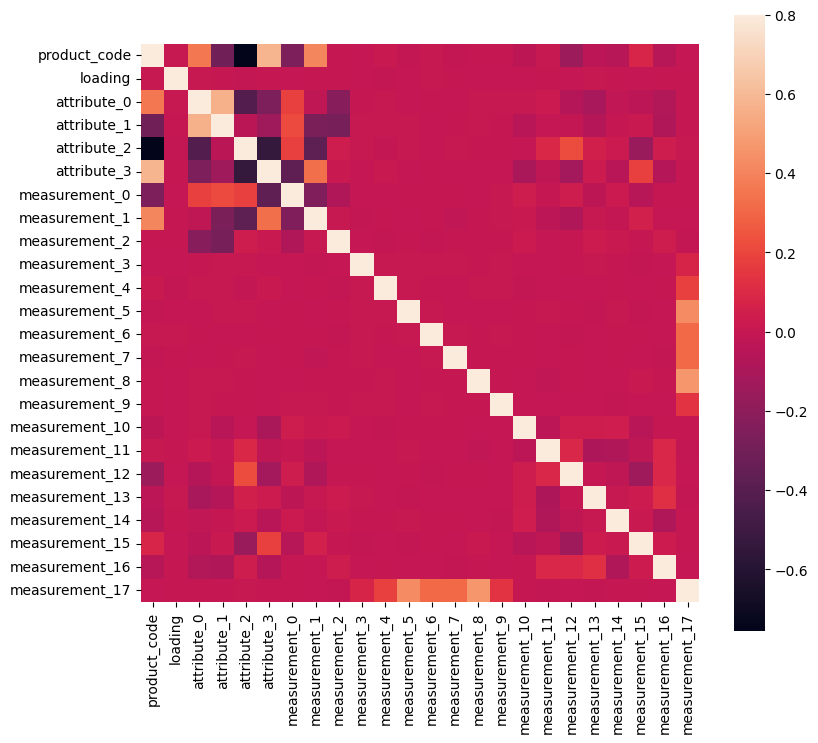

In [262]:
correlation = df_train_data.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(correlation, vmax=.8, square=True);

mostly all the correlations are low

normalization

In [263]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train_data = pd.DataFrame(scaler.fit_transform(df_train_data), columns = df_train_data.columns)
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns = df_test.columns)

In [264]:
df_train_data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.0,0.133088,1.0,1.0,1.0,0.0,0.241379,0.275862,0.166667,0.540698,...,0.574854,0.398095,0.496808,0.389483,0.802337,0.350080,0.524838,0.313848,0.346210,0.508342
1,0.0,0.146669,1.0,1.0,1.0,0.0,0.482759,0.103448,0.125000,0.563670,...,0.311059,0.623619,0.655518,0.413840,0.527209,0.324960,0.477475,0.422536,0.412006,0.434827
2,0.0,0.139694,1.0,1.0,1.0,0.0,0.413793,0.034483,0.208333,0.542956,...,0.357509,0.657524,0.477653,0.509226,0.690701,0.492345,0.721036,0.398499,0.572848,0.418088
3,0.0,0.192543,1.0,1.0,1.0,0.0,0.448276,0.068966,0.250000,0.441774,...,0.447381,0.626540,0.533825,0.448896,0.388364,0.368773,0.487883,0.563009,0.519072,0.564060
4,0.0,0.439183,1.0,1.0,1.0,0.0,0.310345,0.068966,0.333333,0.714115,...,0.334808,0.355556,0.589769,0.566887,0.581066,0.447602,0.275013,0.323351,0.466268,0.343276


In [265]:
df_test.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.0,0.235347,0.0,0.5,0.0,0.0,0.200000,0.272727,0.214286,0.733640,...,0.459242,0.429123,0.475224,0.418083,0.595983,0.356914,0.571138,0.389254,0.623389,0.509978
1,0.0,0.217926,0.0,0.5,0.0,0.0,0.366667,0.242424,0.000000,0.551892,...,0.546241,0.592839,0.340523,0.483767,0.494862,0.662416,0.563192,0.464839,0.325405,0.431359
2,0.0,0.214045,0.0,0.5,0.0,0.0,0.266667,0.363636,0.142857,0.627556,...,0.352017,0.554372,0.555368,0.419437,0.372957,0.333173,0.497250,0.632164,0.483895,0.529624
3,0.0,0.215655,0.0,0.5,0.0,0.0,0.266667,0.333333,0.357143,0.377428,...,0.495065,0.560628,0.634243,0.256788,0.374981,0.504652,0.492496,0.307237,0.491328,0.477498
4,0.0,0.489551,0.0,0.5,0.0,0.0,0.466667,0.484848,0.285714,0.542306,...,0.518582,0.637828,0.381406,0.399391,0.453449,0.550289,0.527538,0.358699,0.577139,0.644076


In [266]:
y = df_train_target
x = df_train_data
X_test = df_test

In [267]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5, random_state=42)
model.fit(df_train_data, df_train_target)
# model = RandomForestClassifier(max_depth=3, random_state=42, class_weight = 'balanced', n_estimators=5000).fit(x, y)
print(model.score(df_train_data, df_train_target))

0.7873917952578096


so we get an accuracy of 78.7%

now lets make prediction

In [268]:
predictor = model.predict(df_test)
prediction_df = pd.DataFrame(predictor, columns = ["failure"])

In [269]:
prediction_df

,failure
0,0
1,0
2,0
3,0
4,0
...,...
20770,0
20771,0
20772,0
20773,0
